In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#temporary
def LIF(_I, Cm, Rm, Vt):
    #I: input current array
    #Cm: constant capitance
    #Rm: resistance parameter
    #Vt: threshold
    
    V_r = -0.065 # resting voltage
    spike=0.04
    T = 0.100
    dt = 0.00002
    # an array of time
    time = np.arange(0, T+dt, dt)
    
    I = np.zeros(len(time))
    I[1000:4000] = _I
    
    V = np.empty(len(time))         # Voltage array
    V[0] = V_r                          # set initial to resting potential
    indicator=False
    
    for i in range(1, len(time)):
        # using "I - V(t)/Rm = Cm * dV/dT"
        dV =  (I[i] - (V[i-1]-V_r)/Rm)/Cm
        if indicator==True:
            V[i] = V_r + dV*dt
        else:
            V[i] = V[i-1] + dV*dt
        indicator=False

        # when exceed threshold
        if V[i] > Vt:
            V[i] = spike   # set the last step to spike value
            if i != len(time): 
                V[i+1] = V_r       # current step is resting membrane potential
                indicator= True

    return V

In [17]:
def I_values(_I=0.005, time=None):
    I = np.zeros(len(time))
    I[1000:4000] = _I
    return I

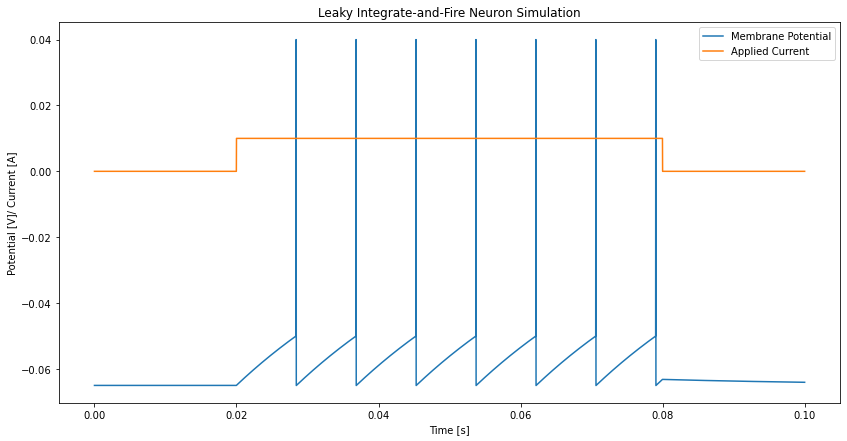

In [19]:
T = 0.100                      
dt  = 0.00002                   
time = np.arange(0, T+dt, dt)      

I_init = 0.01
gl_init = 0.16
Cm_init = 0.0049

V = LIF(_I=I_init, Cm=Cm_init,Rm=1/0.16,Vt=-0.050)
I = I_values(_I=I_init, time=time)

#plot
fig = plt.figure("Leaky Integrate-and-Fire Neuron", figsize=(14, 7))
ax = fig.add_subplot(111)
plt.title("Leaky Integrate-and-Fire Neuron Simulation")


line = plt.plot(time, V, label="Membrane Potential")[0]
line2 = plt.plot(time, I, label="Applied Current")[0]

plt.legend(loc="upper right")

# add axis labels
plt.ylabel("Potential [V]/ Current [A]")
plt.xlabel("Time [s]")

plt.show()